### Dataset Information

Phone dataset contains reviews for natural language processing. The dataset contains two columns - review and sentiment to perform the sentimental analysis.

### Problem Statement
For reviews, correctly categorize positive and negative reviews.

### Overview
Performed cleaning on the dataset. As a learning modals used Logistic Regression, Multinomial Naive Bayes, Linear SVM and XGBoost and LSTM.

# **1. Importing Libraries**

In [159]:
print('start')

start


# **2. Data Extraction and Cleaning**

In [160]:
import pandas as pd
import nltk

In [161]:
import pandas as pd
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhengissov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [162]:
import pandas as pd
data=pd.read_csv('kazakh_revs.csv')
data.head(10)

review  sentiment
0                   Өте жақсы ризамын телефон ұнады!          1
1  Барлығы ұнады, уақытында келді, сатушы жақсы, ...          1
2                              Керемет телефон екен.          1
3                                    Уақытында келді          1
4        Рахмет сіздерге! Сапалы, жақсы телефон екен          1
5  Маған қатты ұнады! Бірінші рет IPhone телефоны...          1
6                              Керемет. Ұлыма ұнады.          1
7                               Маған ұнады керемет.          1
8        Өте керемет, жеткізу уақытынан бұрын әкелді          1
9                               Телефон балама ұнады          1

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     370 non-null    object
 1   sentiment  370 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [164]:
data.describe() #descriptive statistics

sentiment
count  370.000000
mean     0.454054
std      0.498559
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000

In [165]:
null_values = data.isnull().sum() #identifying missing values

In [166]:
null_values.index[0]

'review'

In [167]:
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))

There are 0 missing values for review and 0 missing values for sentiment.


In [168]:
num_duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 7 duplicate reviews present in the dataset


In [169]:
#view duplicate reviews
review = data['review']
duplicated_review = data[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head()

review  sentiment
23   Бағасы. Сапасы. Камерасы, даусы бәрі керемет. ...          1
360  Бағасы. Сапасы. Камерасы, даусы бәрі керемет. ...          1
208  Көп теория, теория, теория. Сіздің бүкіл өмірі...          0
262  Көп теория, теория, теория. Сіздің бүкіл өмірі...          0
14   Смартфон жылдам жұмыс істеп тұр. Экраны үлкен ...          1

In [170]:
#drop duplicate reviews
data.drop_duplicates(inplace = True)

In [171]:
stop = stopwords.words('kazakh')
wl = WordNetLemmatizer()

In [172]:
def clean_text(text):
    alphaPattern      = "[^\W\d_]"
    text = re.sub(r"[\W\d_]", " ", text)
        
    filtered_list = []
    stop_words = stopwords.words('kazakh')
    
    # my new custom stopwords
    my_extra = ['және', 'телефон', 'телефонды', 'оны', 'университет']
    # add the new custom stopwrds to my stopwords
    stop_words.extend(my_extra)
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w.lower() not in stop_words:
            filtered_list.append(w)

    return ' '.join(filtered_list)

clean_text('Телефон жақсы екен. Және ұнады')

'жақсы екен ұнады'

In [173]:
data_copy = data.copy()
data.head()

review  sentiment
0                   Өте жақсы ризамын телефон ұнады!          1
1  Барлығы ұнады, уақытында келді, сатушы жақсы, ...          1
2                              Керемет телефон екен.          1
3                                    Уақытында келді          1
4        Рахмет сіздерге! Сапалы, жақсы телефон екен          1

In [174]:
stop_words = stopwords.words('kazakh')
print(stop_words)

['ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'тағыда', 'әрине', 'жоқ', 'сондай', 'осындай', 'осылай', 'солай', 'мұндай', 'бұндай', 'мен', 'сен', 'ол', 'біз', 'біздер', 'олар', 'сіз', 'сіздер', 'маған', 'оған', 'саған', 'біздің', 'сіздің', 'оның', 'бізге', 'сізге', 'оларға', 'біздерге', 'сіздерге', 'оларға', 'менімен', 'сенімен', 'онымен', 'бізбен', 'сізбен', 'олармен', 'біздермен', 'сіздермен', 'менің', 'сенің', 'біздің', 'сіздің', 'оның', 'біздердің', 'сіздердің', 'олардың', 'маған', 'саған', 'оған', 'менен', 'сенен', 'одан', 'бізден', 'сізден', 'олардан', 'біздерден', 'сіздерден', 'олардан', 'айтпақшы', 'сонымен', 'сондықтан', 'бұл', 'осы', 'сол', 'анау', 'мынау', 'сонау', 'осынау', 'ана', 'мына', 'сона', 'әні', 'міне', 'өй', 'үйт', 'бүйт', 'біреу', 'кейбіреу', 'кейбір', 'қайсыбір', 'әрбір', 'бірнеше', 'бірдеме', 'бірнеше', 'әркім', 'әрне', 'әрқайсы', 'әрқалай', 'әлдекім', 'әлдене', 'әлдеқайдан', 'әлденеше', 'әлдеқалай', 'әлдеқашан', 'алдақашан', 'еш', 'ешкім', 'ешбір', 'ештеме', 'дә

In [175]:
data['review']=data['review'].apply(clean_text)

In [176]:
#converting target variable to numeric labels
# data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

In [177]:
#after converting labels
data.head()

review  sentiment
0                            Өте жақсы ризамын ұнады          1
1  Барлығы ұнады уақытында келді сатушы жақсы бәр...          1
2                                       Керемет екен          1
3                                    Уақытында келді          1
4                           Рахмет Сапалы жақсы екен          1

# **3. Exploratory data analysis** 

In [178]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/Users/zhengissov/miniconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


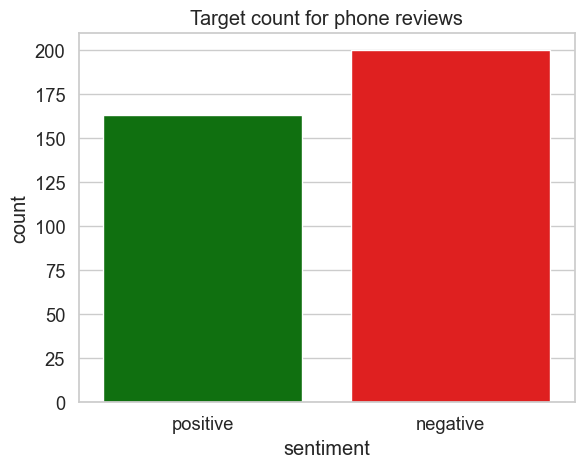

In [179]:
### Count Plot
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(data.sentiment,palette = ['green','red'],order = [1,0])
plt.xticks(ticks = np.arange(2),labels = ['positive','negative'])
plt.title('Target count for phone reviews')
plt.show()

In [180]:
print('Positive reviews are', (round(data['sentiment'].value_counts()[1])),'i.e.', round(data['sentiment'].value_counts()[1]/len(data) * 100,2), '% of the dataset')
print('Negative reviews are', (round(data['sentiment'].value_counts()[0])),'i.e.',round(data['sentiment'].value_counts()[0]/len(data) * 100,2), '% of the dataset')

Positive reviews are 163 i.e. 44.9 % of the dataset
Negative reviews are 200 i.e. 55.1 % of the dataset


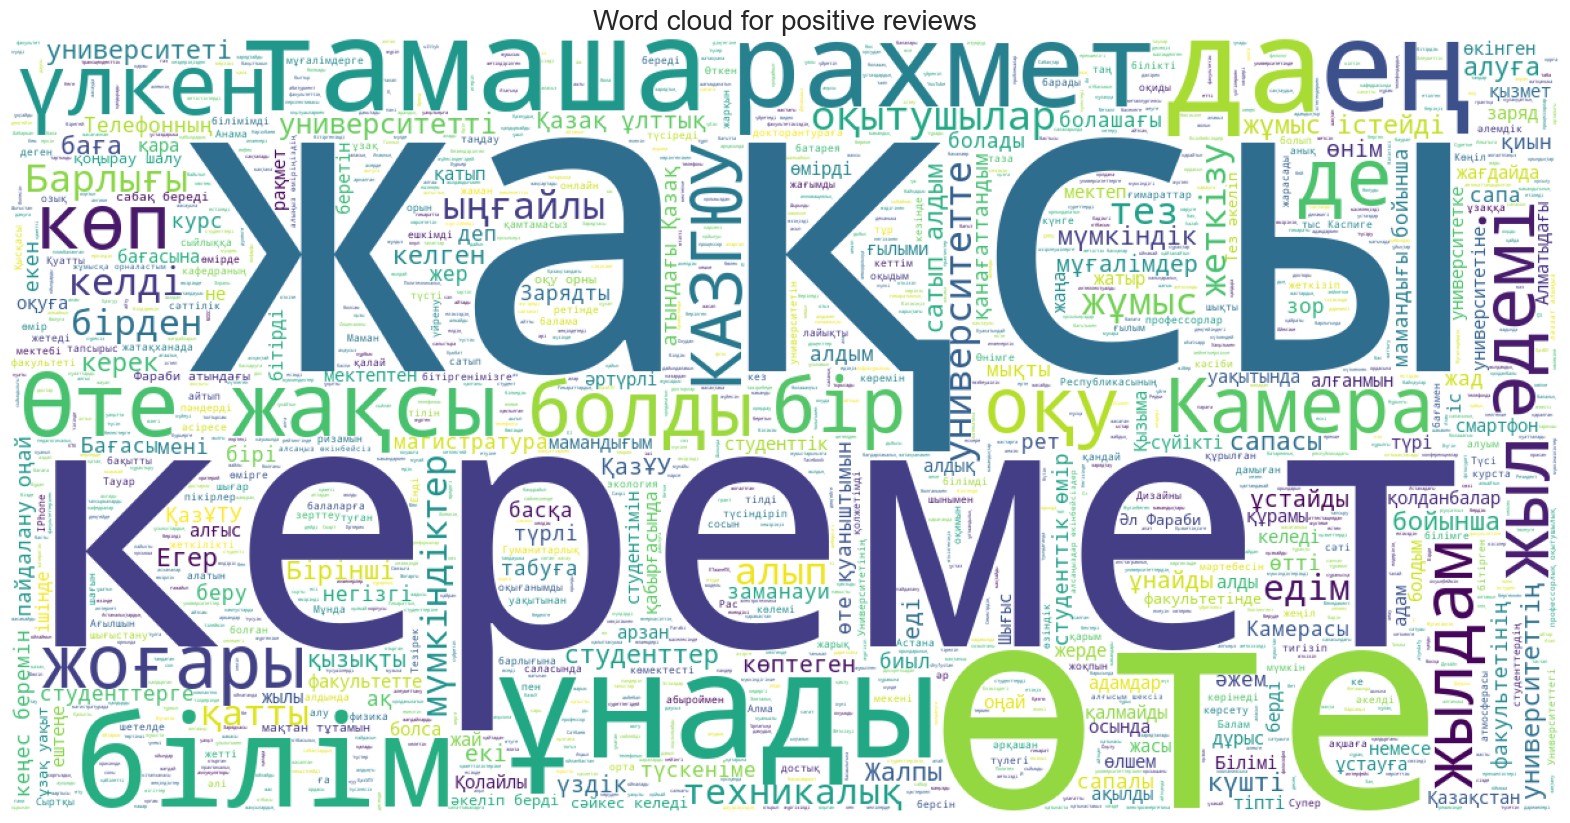

In [48]:
#word cloud for positive reviews
positive_data = data[data.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc)
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

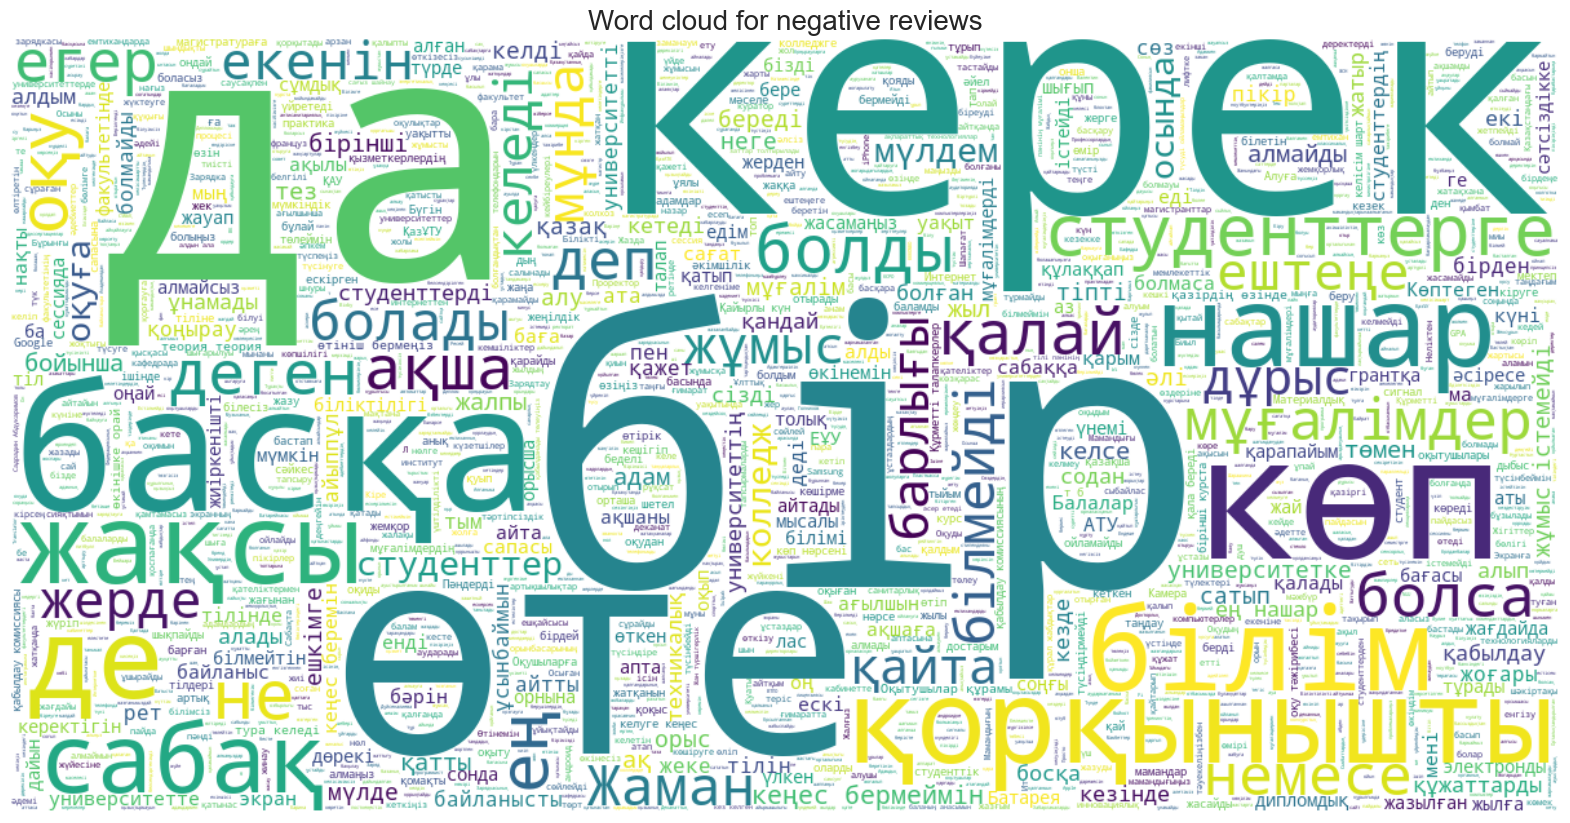

In [49]:
#word cloud for negative reviews
negative_data = data[data.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

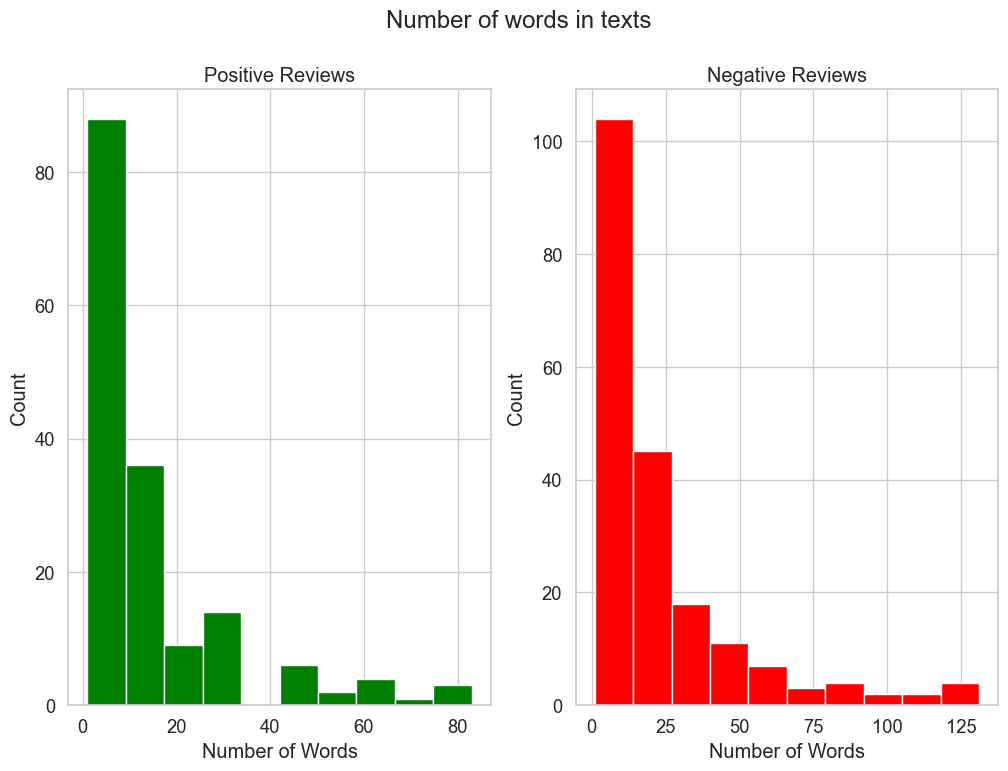

In [50]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

In [51]:
# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
# word = positive_data.str.split().apply(lambda x : len(x) )
# sns.distplot(word, ax=ax1,color='green')
# ax1.set_title('Positive Reviews')
# ax1.set_xlabel('Number of words per review')
# word = negative_data.str.split().apply(lambda x :len(x) )
# sns.distplot(word,ax=ax2,color='red')
# ax2.set_title('Negative Reviews')
# ax2.set_xlabel('Number of words per review')
# fig.suptitle('Distribution of number of words per reviews')
# plt.show()

In [52]:

# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
# word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
# sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
# ax1.set_title('Positive Reviews')
# ax1.set_xlabel('Average word length per review')
# word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
# sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
# ax2.set_title('Negative Reviews')
# ax2.set_xlabel('Average word length per review')
# fig.suptitle('Distribution of average word length in each review')
# plt.show()

In [53]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.review)
corpus[:5]

['Өте', 'жақсы', 'ризамын', 'ұнады', 'Барлығы']

In [54]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0  жақсы      89
1    өте      61
2     да      54
3    бір      46
4     ең      39
5  білім      37
6    көп      34
7  жұмыс      33
8  керек      33
9    оқу      32

In [55]:
most_common = most_common.sort_values('countv')

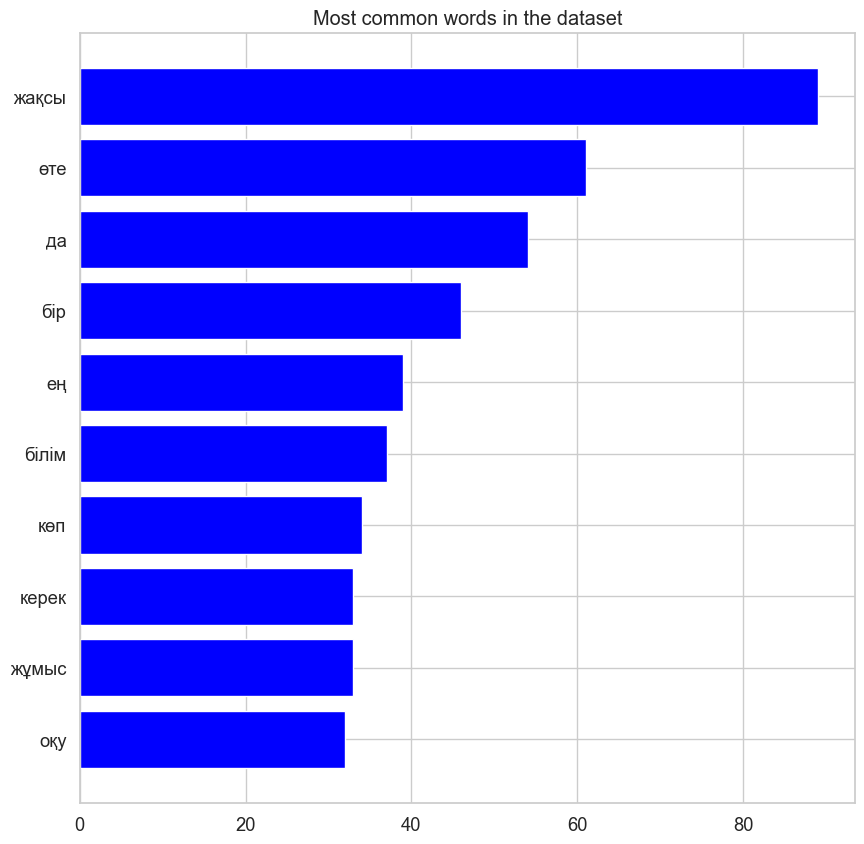

In [56]:
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()


In [57]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

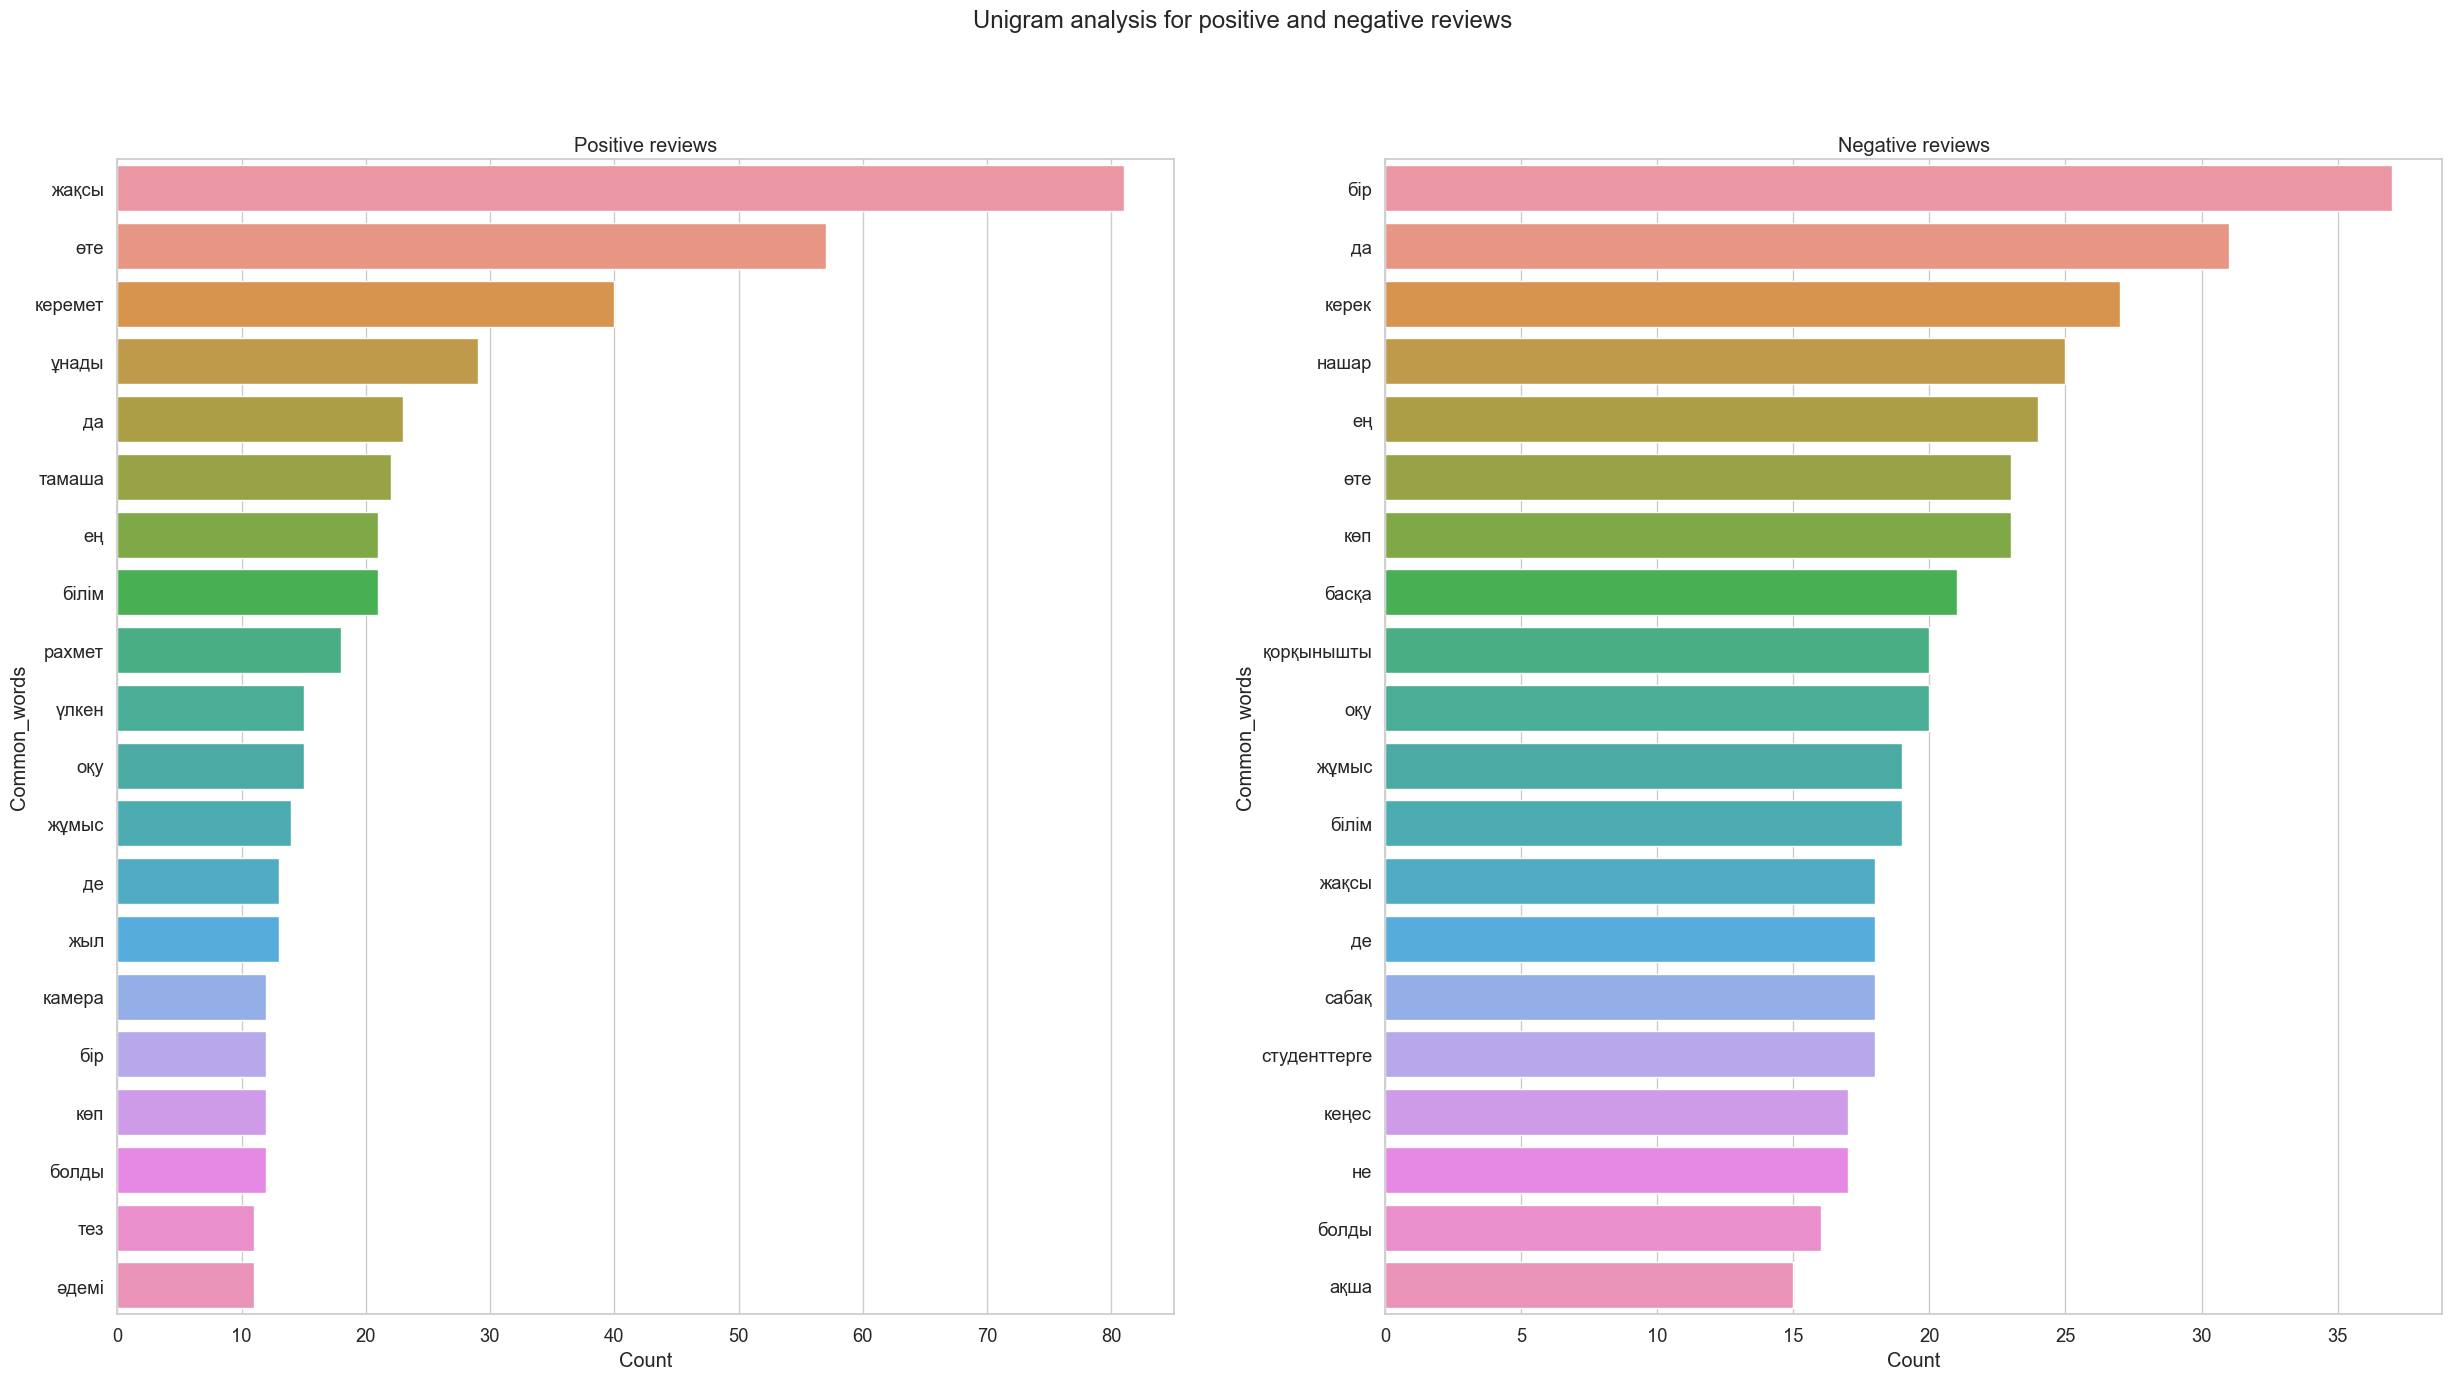

In [58]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


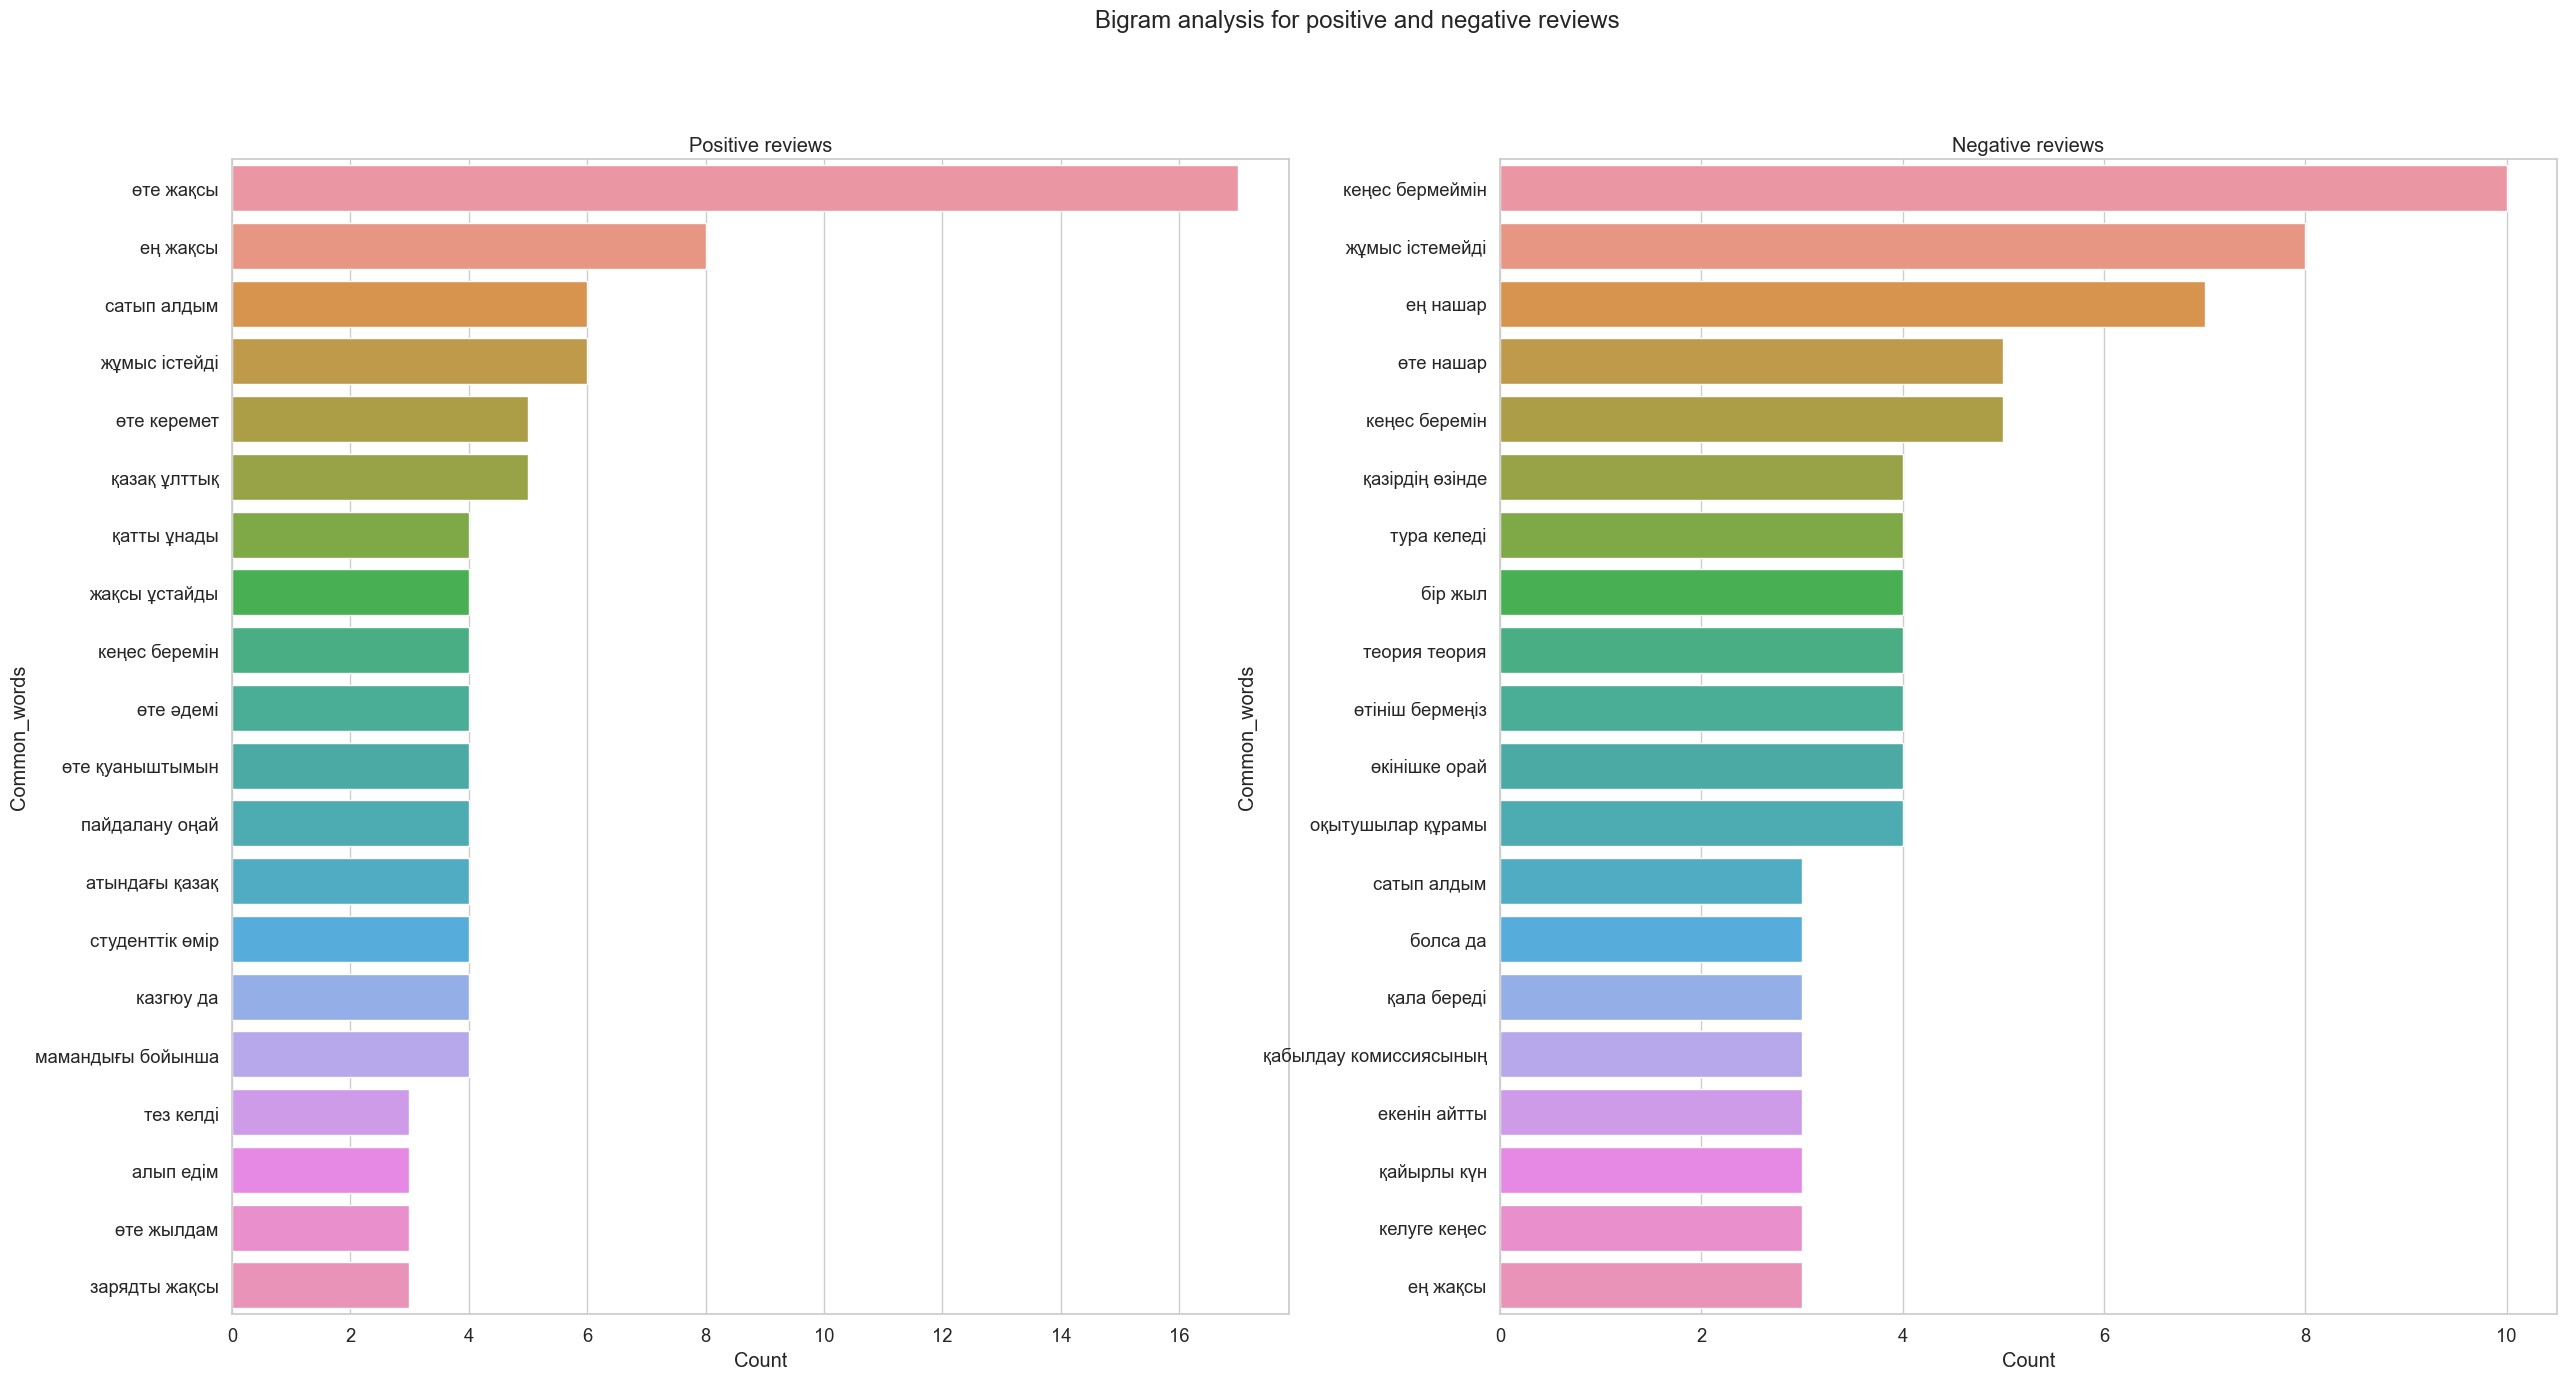

In [91]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

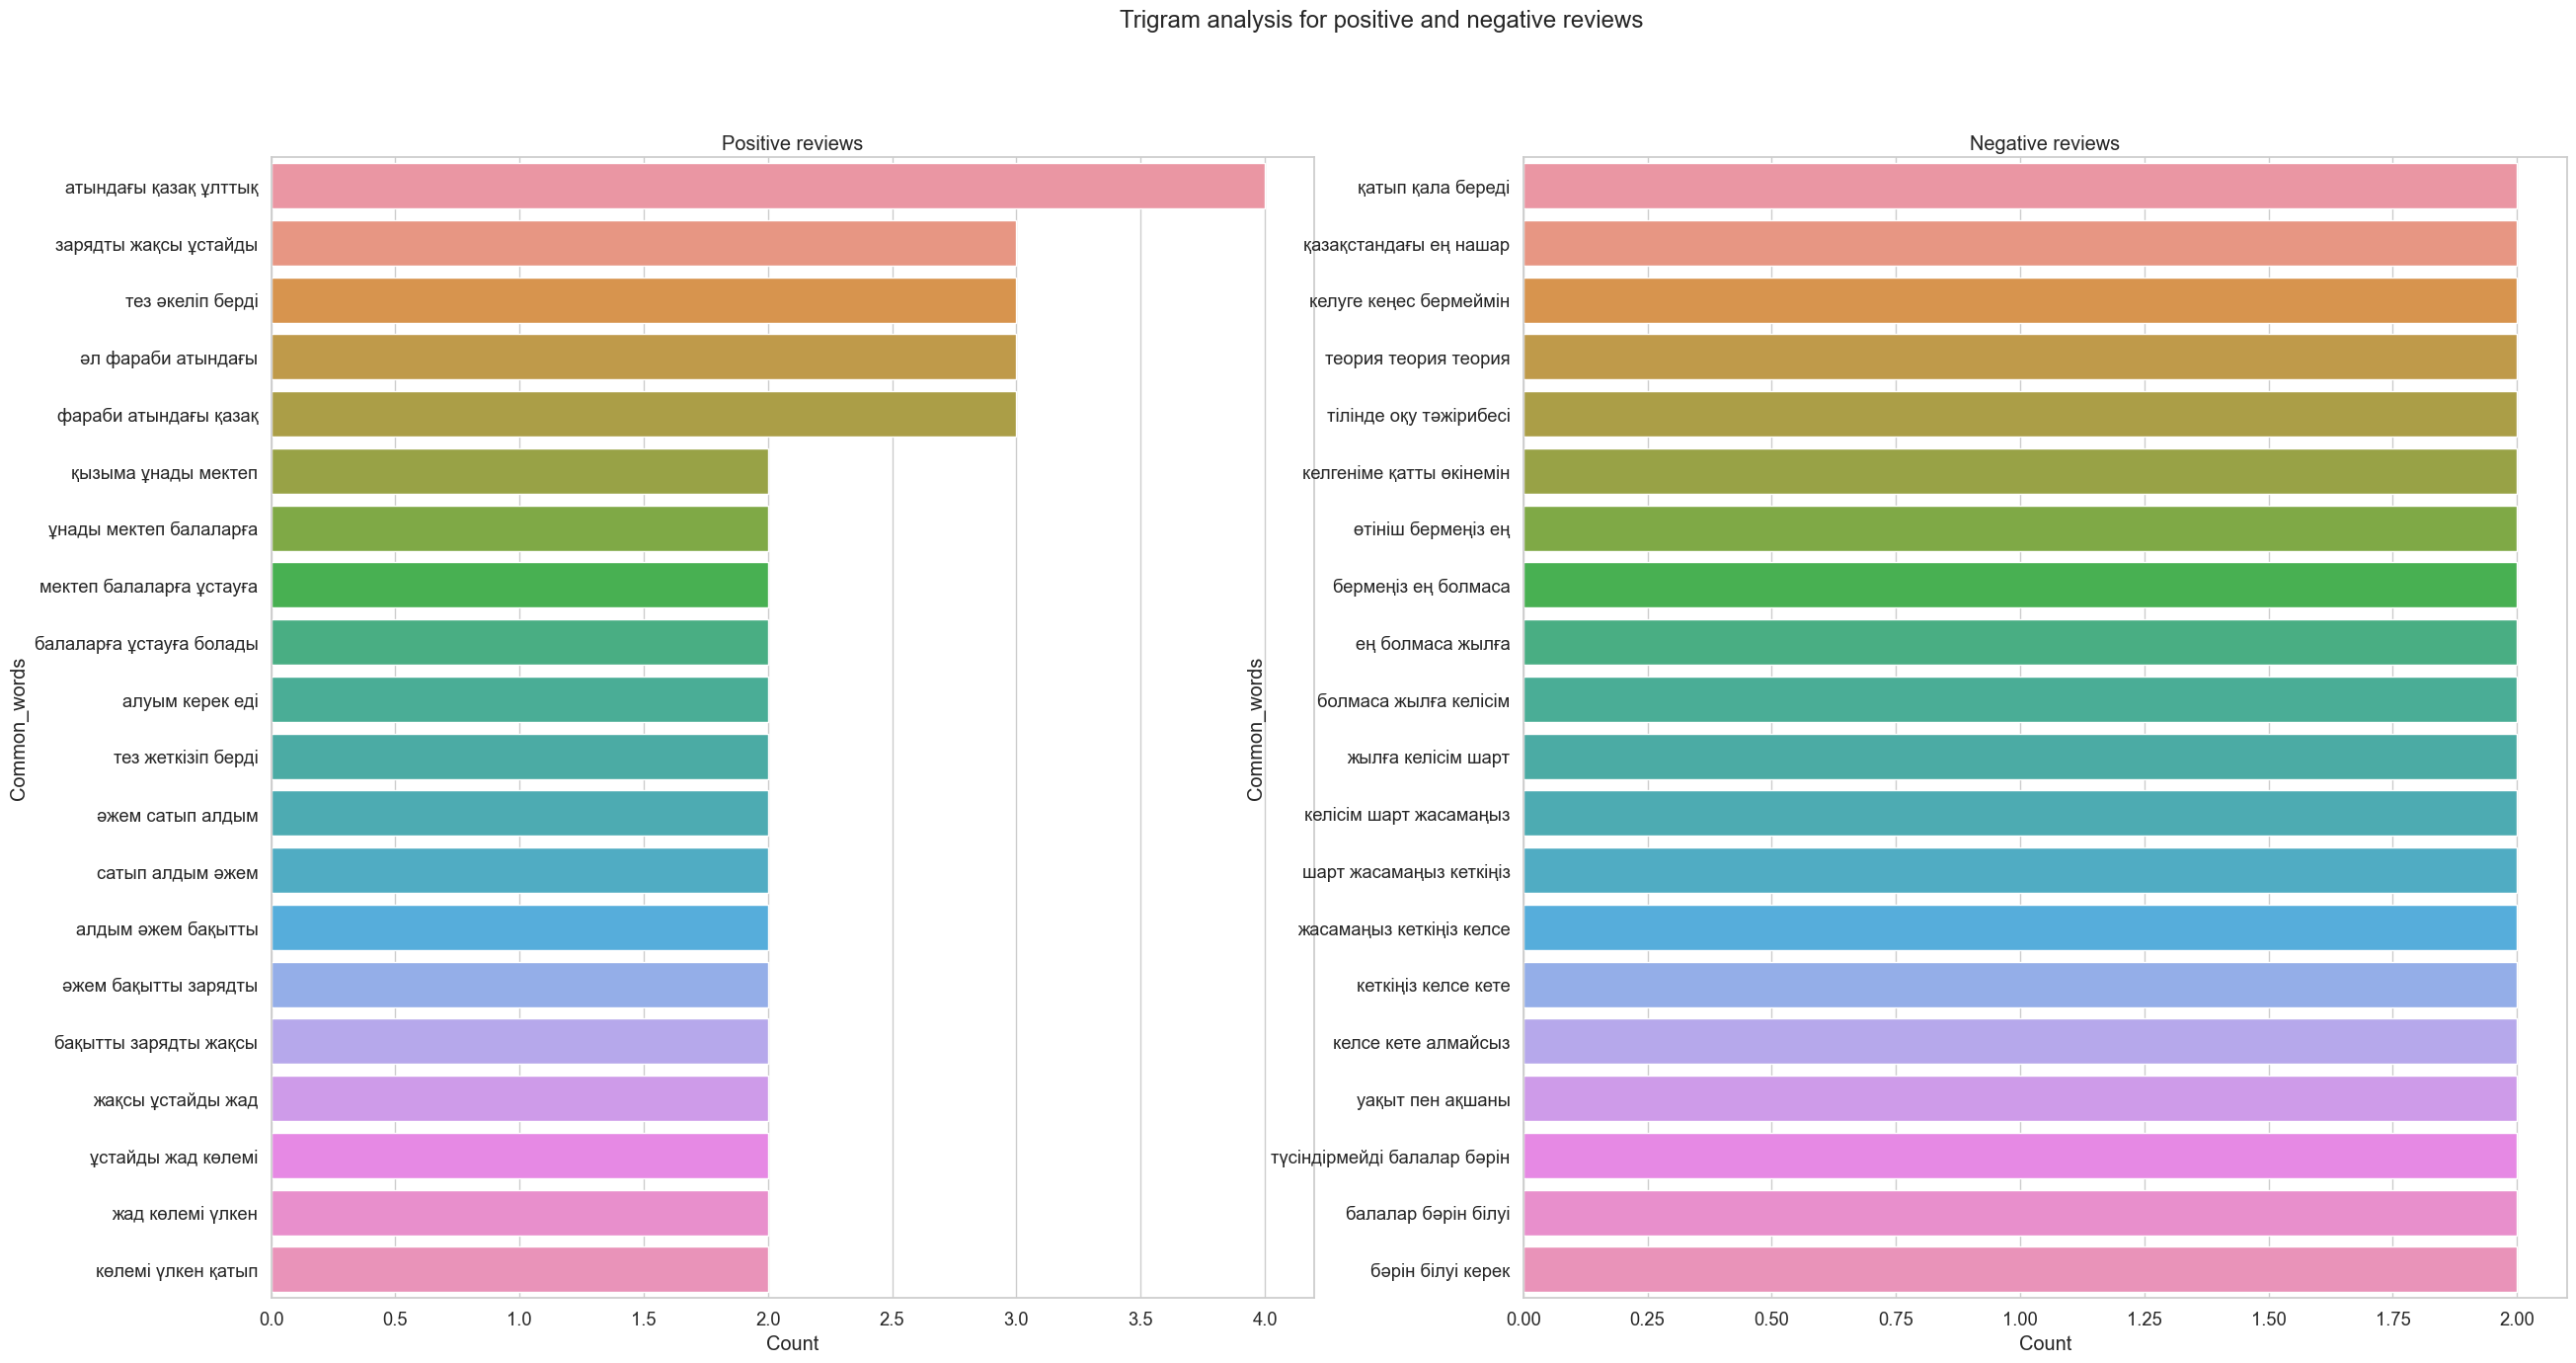

In [92]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

# **4. Predictive Modelling using Machine Learning** 

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier

In [182]:
#splitting into train and test
train, test= train_test_split(data, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']
print(train, test)

                                                review  sentiment
209  Тілдік кедергі университетке орысша қазақша бі...          0
344  Анама сатып алдым Негізінде қоңырау шалу қабыл...          1
364                                 Қызыма алдым үнады          1
75             Бағасы өнімнің сапасына сәйкес келмейді          0
84   Камерасы өте жақсы үйрену қиын Керемет суретте...          1
..                                                 ...        ...
71   Зарядты ұзақ ұстайды Камера тамаша Қызықты ере...          1
106  бағасы тамаша қоңырау шалу сапасы жақсы whatsa...          1
272  жағдайда ұсынбаймын Білікті факультет ешкімге ...          0
354  өте тез келді тапсырыс бергеннен бір жарым апт...          1
102  Сыртқы түрі жарқын Металл қабық таза сыртқы тү...          1

[290 rows x 2 columns]                                                 review  sentiment
163                     университетке қайтып келмеспін          0
33        Қызыма ұнады мектеп балаларға ұстауға бола

In [183]:
#Vectorizing data

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)


count_vect = CountVectorizer() # CountVectorizer
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        40
           1       1.00      0.70      0.82        33

    accuracy                           0.86        73
   macro avg       0.90      0.85      0.86        73
weighted avg       0.89      0.86      0.86        73

Logistic Regression Accuracy : 86.30%


/Users/zhengissov/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


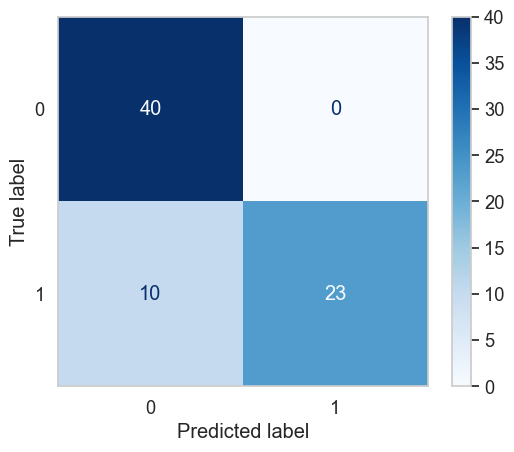

In [184]:
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print(classification_report(ytest, p1))
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(Xtrain_tfidf, ytrain)
def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform((text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [186]:

text = ["Телефон өте әдемі, ұнады, енеме сыйлыққа алғанмын."]

df = predict(tfidf_vect, lr, text)
print(df)

import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

                                                text sentiment
0  Телефон өте әдемі, ұнады, енеме сыйлыққа алған...  Positive


In [187]:

text = ["Жақсы телефон",
        "Камерасы мықты, керемет",
        "Тамаша телефон, қолдануға оңай",
        "Өте тез жұмыс жасайды"]

df = predict(tfidf_vect, lr, text)
print(df)

                             text sentiment
0                   Жақсы телефон  Positive
1         Камерасы мықты, керемет  Positive
2  Тамаша телефон, қолдануға оңай  Positive
3           Өте тез жұмыс жасайды  Positive


### Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.90      0.85      0.88        33

    accuracy                           0.89        73
   macro avg       0.89      0.89      0.89        73
weighted avg       0.89      0.89      0.89        73

Multinomial Naive Bayes Classifier Accuracy : 89.04%


/Users/zhengissov/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


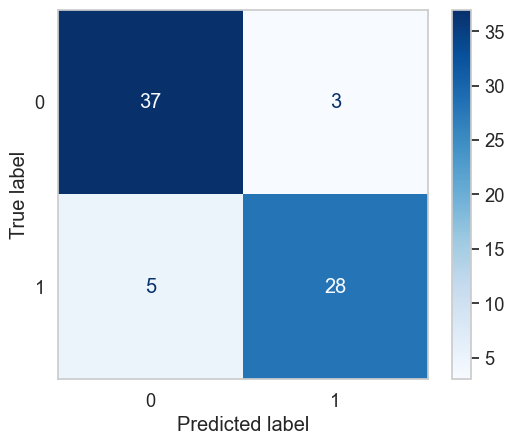

In [188]:
mnb= MultinomialNB()
mnb.fit(Xtrain_tfidf,ytrain)
p2=mnb.predict(Xtest_tfidf)
s2=accuracy_score(ytest,p2)
print(classification_report(ytest, p2))
print("Multinomial Naive Bayes Classifier Accuracy :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(mnb, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)

In [189]:
text = ["Маған ұнамады, қатып қала береді",
        "Байланыс ұстамайды, нашар",
        "Маған ұнамады",
        "Камерасы онша емес, телефон соғылмайды"]

df = predict(tfidf_vect, mnb, text)
print(df)

                                     text sentiment
0        Маған ұнамады, қатып қала береді  Negative
1               Байланыс ұстамайды, нашар  Negative
2                           Маған ұнамады  Negative
3  Камерасы онша емес, телефон соғылмайды  Negative


In [190]:
text = ["Жақсы телефон",
        "Камерасы мықты, керемет",
        "Тамаша телефон, қолдануға оңай",
        "Өте тез жұмыс жасайды"]

df = predict(tfidf_vect, mnb, text)
print(df)

                             text sentiment
0                   Жақсы телефон  Positive
1         Камерасы мықты, керемет  Positive
2  Тамаша телефон, қолдануға оңай  Positive
3           Өте тез жұмыс жасайды  Positive


### Linear SVM

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        40
           1       0.96      0.76      0.85        33

    accuracy                           0.88        73
   macro avg       0.90      0.87      0.87        73
weighted avg       0.89      0.88      0.87        73

Linear Support Vector Classifier Accuracy : 87.67%


/Users/zhengissov/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


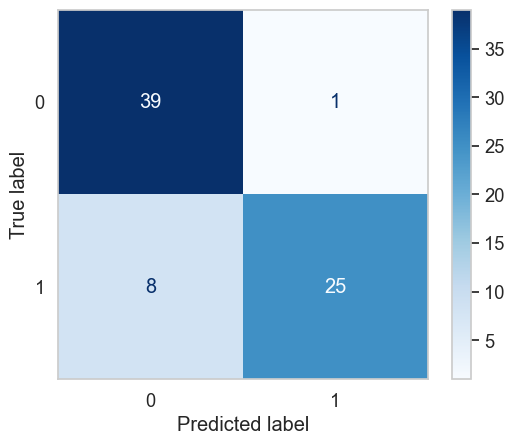

In [191]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p3=linear_svc.predict(Xtest_tfidf)
s3=accuracy_score(ytest,p3)
print(classification_report(ytest, p3))
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)

In [192]:
text = ["Маған ұнамады, қатып қала береді",
        "Байланыс ұстамайды, нашар",
        "Маған ұнамады",
        "Камерасы онша емес, телефон соғылмайды"]

df = predict(tfidf_vect, linear_svc, text)
print(df)

                                     text sentiment
0        Маған ұнамады, қатып қала береді  Negative
1               Байланыс ұстамайды, нашар  Negative
2                           Маған ұнамады  Negative
3  Камерасы онша емес, телефон соғылмайды  Negative


In [193]:

text = ["Жақсы телефон",
        "Камерасы мықты, керемет",
        "Тамаша телефон, қолдануға оңай",
        "Өте тез жұмыс жасайды"]

df = predict(tfidf_vect, linear_svc, text)
print(df)

                             text sentiment
0                   Жақсы телефон  Positive
1         Камерасы мықты, керемет  Positive
2  Тамаша телефон, қолдануға оңай  Positive
3           Өте тез жұмыс жасайды  Positive


### XGboost 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.89      0.73      0.80        33

    accuracy                           0.84        73
   macro avg       0.85      0.83      0.83        73
weighted avg       0.84      0.84      0.83        73

XGBoost Accuracy : 83.56%


/Users/zhengissov/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


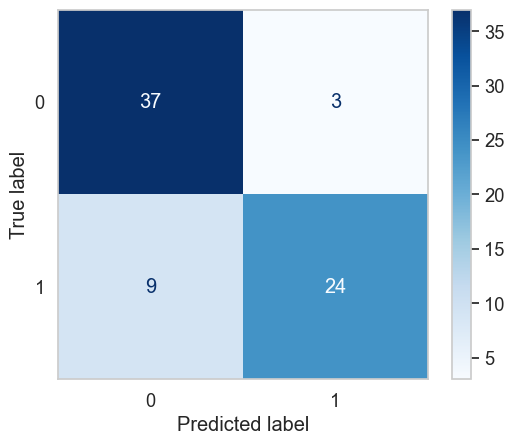

In [196]:
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,ytrain)
p4=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(ytest,p4)
print(classification_report(ytest, p4))
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)

In [197]:
text = ["Маған ұнамады, қатып қала береді",
        "Байланыс ұстамайды, нашар",
        "Маған ұнамады",
        "Камерасы онша емес, телефон соғылмайды"]

df = predict(tfidf_vect, xgbo, text)
print(df)

                                     text sentiment
0        Маған ұнамады, қатып қала береді  Negative
1               Байланыс ұстамайды, нашар  Negative
2                           Маған ұнамады  Negative
3  Камерасы онша емес, телефон соғылмайды  Negative


In [198]:

text = ["Жақсы телефон",
        "Камерасы мықты, керемет",
        "Тамаша телефон, қолдануға оңай",
        "Өте тез жұмыс жасайды"]

df = predict(tfidf_vect, xgbo, text)
print(df)

                             text sentiment
0                   Жақсы телефон  Positive
1         Камерасы мықты, керемет  Positive
2  Тамаша телефон, қолдануға оңай  Positive
3           Өте тез жұмыс жасайды  Positive


# **5. Predictive Modelling using Deep Learning** 

In [199]:
import torch
import torch.nn.functional as F
import torchtext
import time
import random
import pandas as pd

torch.backends.cudnn.deterministic = True

## General Settings

In [12]:
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)

VOCABULARY_SIZE = 20000
LEARNING_RATE = 0.005
BATCH_SIZE = 128
NUM_EPOCHS = 30
DEVICE = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

EMBEDDING_DIM = 128
HIDDEN_DIM = 256
NUM_CLASSES = 2

Define the Label and Text field formatters:

In [13]:
### Defining the feature processing

TEXT = torchtext.data.Field(
    tokenize='spacy', # default splits on whitespace
    tokenizer_language='xx_ent_wiki_sm'
)

### Defining the label processing

LABEL = torchtext.data.LabelField(dtype=torch.long)

Process the dataset:

In [14]:
fields = [('review', TEXT), ('sentiment', LABEL)]

dataset = torchtext.data.TabularDataset(
    path='kazakh_revs.csv', format='csv',
    skip_header=True, fields=fields)

## Split Dataset into Train/Validation/Test

Split the dataset into training, validation, and test partitions:

In [15]:
train_data, test_data = dataset.split(
    split_ratio=[0.8, 0.2],
    random_state=random.seed(RANDOM_SEED))

print(f'Num Train: {len(train_data)}')
print(f'Num Test: {len(test_data)}')

Num Train: 296
Num Test: 74


In [16]:
train_data, valid_data = train_data.split(
    split_ratio=[0.8, 0.2],
    random_state=random.seed(RANDOM_SEED))

print(f'Num Train: {len(train_data)}')
print(f'Num Validation: {len(valid_data)}')

Num Train: 237
Num Validation: 59


In [17]:
print(vars(train_data.examples[0]))

{'review': ['Уақытында', 'келді'], 'sentiment': '1'}


## Build Vocabulary

Build the vocabulary based on the top "VOCABULARY_SIZE" words:

In [18]:
TEXT.build_vocab(train_data, max_size=VOCABULARY_SIZE)
LABEL.build_vocab(train_data)

print(f'Vocabulary size: {len(TEXT.vocab)}')
print(f'Number of classes: {len(LABEL.vocab)}')

Vocabulary size: 2726
Number of classes: 2


**Look at most common words:**

In [19]:
print(TEXT.vocab.freqs.most_common(20))

[(',', 560), ('.', 433), ('!', 93), ('-', 73), ('және', 68), ('жақсы', 57), ('мен', 57), ('университет', 44), ('үшін', 42), ('бұл', 40), ('да', 40), ('емес', 37), ('өте', 36), ('Мен', 35), ('Бұл', 33), ('телефон', 33), ('жоқ', 31), ('бір', 28), ('көп', 26), ('олар', 26)]


**Tokens corresponding to the first 10 indices (0, 1, ..., 9):**

In [20]:
print(TEXT.vocab.itos[:10]) # itos = integer-to-string

['<unk>', '<pad>', ',', '.', '!', '-', 'және', 'жақсы', 'мен', 'университет']


**Converting a string to an integer:**

In [22]:
print(TEXT.vocab.stoi['жақсы']) # stoi = string-to-integer

7


**Class labels:**

In [23]:
print(LABEL.vocab.stoi)

defaultdict(None, {'0': 0, '1': 1})


**Class label count:**

In [24]:
LABEL.vocab.freqs

Counter({'0': 127, '1': 110})

## Define Data Loaders

In [25]:
train_loader, valid_loader, test_loader = \
    torchtext.data.BucketIterator.splits(
        (train_data, valid_data, test_data),
         batch_size=BATCH_SIZE,
         sort_within_batch=False,
         sort_key=lambda x: len(x.review),
         device=DEVICE
    )

Testing the iterators (note that the number of rows depends on the longest document in the respective batch):

In [26]:
print('Train')
for batch in train_loader:
    print(f'Text matrix size: {batch.review.size()}')
    print(f'Target vector size: {batch.sentiment.size()}')
    break
    
print('\nValid:')
for batch in valid_loader:
    print(f'Text matrix size: {batch.review.size()}')
    print(f'Target vector size: {batch.sentiment.size()}')
    break
    
print('\nTest:')
for batch in test_loader:
    print(f'Text matrix size: {batch.review.size()}')
    print(f'Target vector size: {batch.sentiment.size()}')
    break

Train
Text matrix size: torch.Size([175, 128])
Target vector size: torch.Size([128])

Valid:
Text matrix size: torch.Size([193, 59])
Target vector size: torch.Size([59])

Test:
Text matrix size: torch.Size([206, 74])
Target vector size: torch.Size([74])


## Model

In [40]:
class RNN(torch.nn.Module):
    
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()

        self.embedding = torch.nn.Embedding(input_dim, embedding_dim)
        #self.rnn = torch.nn.RNN(embedding_dim,
        #                        hidden_dim,
        #                        nonlinearity='relu')
        self.rnn = torch.nn.LSTM(embedding_dim,
                                 hidden_dim)      
        print(self.embedding)
        
        self.fc = torch.nn.Linear(hidden_dim, output_dim)
        

    def forward(self, text):
        # text dim: [sentence length, batch size]
        
        embedded = self.embedding(text)
        
        # embedded dim: [sentence length, batch size, embedding dim]
        
        output, (hidden, cell) = self.rnn(embedded)
        print(hidden)
        # output dim: [sentence length, batch size, hidden dim]
        # hidden dim: [1, batch size, hidden dim]

        hidden.squeeze_(0)
        # hidden dim: [batch size, hidden dim]
        
        output = self.fc(hidden)
        return output

In [41]:
torch.manual_seed(RANDOM_SEED)
model = RNN(input_dim=len(TEXT.vocab),
            embedding_dim=EMBEDDING_DIM,
            hidden_dim=HIDDEN_DIM,
            output_dim=NUM_CLASSES # could use 1 for binary classification
)

model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

Embedding(2726, 128)


## Training

In [42]:
def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [43]:
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, batch_data in enumerate(train_loader):
        
        text = batch_data.review.to(DEVICE)
        labels = batch_data.sentiment.to(DEVICE)

        ### FORWARD AND BACK PROP
        logits = model(text)
        loss = F.cross_entropy(logits, labels)
        optimizer.zero_grad()
        
        loss.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} | '
                   f'Loss: {loss:.4f}')

    with torch.set_grad_enabled(False):
        print(f'training accuracy: '
              f'{compute_accuracy(model, train_loader, DEVICE):.2f}%'
              f'\nvalid accuracy: '
              f'{compute_accuracy(model, valid_loader, DEVICE):.2f}%')
        
    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')
    
print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f}%')

tensor([[[-0.0289, -0.1278, -0.0237,  ...,  0.0348, -0.2355, -0.1173],
         [-0.0289, -0.1278, -0.0237,  ...,  0.0348, -0.2355, -0.1173],
         [-0.0289, -0.1278, -0.0237,  ...,  0.0348, -0.2355, -0.1173],
         ...,
         [-0.0289, -0.1278, -0.0237,  ...,  0.0348, -0.2355, -0.1173],
         [-0.0289, -0.1278, -0.0237,  ...,  0.0348, -0.2355, -0.1173],
         [-0.0300, -0.1211, -0.0293,  ...,  0.0334, -0.2336, -0.1182]]],
       grad_fn=<StackBackward0>)
Epoch: 001/030 | Batch 000/002 | Loss: 0.6936
tensor([[[ 0.0640, -0.7057,  0.1045,  ..., -0.0713, -0.6197, -0.6436],
         [ 0.0640, -0.7057,  0.1045,  ..., -0.0713, -0.6197, -0.6436],
         [ 0.0640, -0.7057,  0.1045,  ..., -0.0713, -0.6197, -0.6436],
         ...,
         [ 0.0640, -0.7057,  0.1045,  ..., -0.0713, -0.6197, -0.6436],
         [ 0.0640, -0.7057,  0.1045,  ..., -0.0713, -0.6197, -0.6436],
         [ 0.0640, -0.7057,  0.1045,  ..., -0.0713, -0.6197, -0.6436]]],
       grad_fn=<StackBackward0>)
tens

Epoch: 004/030 | Batch 000/002 | Loss: 0.7081
tensor([[[ 5.1853e-01,  9.4804e-02,  4.0638e-01,  ..., -4.0899e-04,
           1.0915e-01,  2.5522e-02],
         [ 5.1853e-01,  9.4804e-02,  4.0638e-01,  ..., -4.0899e-04,
           1.0915e-01,  2.5522e-02],
         [ 5.1853e-01,  9.4804e-02,  4.0638e-01,  ..., -4.0899e-04,
           1.0915e-01,  2.5522e-02],
         ...,
         [ 5.1853e-01,  9.4804e-02,  4.0638e-01,  ..., -4.0899e-04,
           1.0915e-01,  2.5522e-02],
         [ 5.1853e-01,  9.4804e-02,  4.0638e-01,  ..., -4.0899e-04,
           1.0915e-01,  2.5522e-02],
         [ 5.1853e-01,  9.4804e-02,  4.0638e-01,  ..., -4.0899e-04,
           1.0915e-01,  2.5522e-02]]], grad_fn=<StackBackward0>)
tensor([[[ 0.4791,  0.1192,  0.3577,  ..., -0.0006,  0.1374,  0.0196],
         [ 0.4791,  0.1192,  0.3577,  ..., -0.0006,  0.1374,  0.0196],
         [ 0.4791,  0.1192,  0.3577,  ..., -0.0006,  0.1374,  0.0196],
         ...,
         [ 0.4791,  0.1192,  0.3577,  ..., -0.0006,  0.

tensor([[[ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         ...,
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [-0.0062,  0.1808,  0.1878,  ..., -0.0100, -0.1088, -0.0679]]])
training accuracy: 53.59%
valid accuracy: 55.93%
Time elapsed: 0.11 min
tensor([[[ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [-0.1234, -0.0269,  0.0025,  ..., -0.0866, -0.1087, -0.1771],
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         ...,
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066],
         [ 0.3228,  0.1494,  0.2044,  ..., -0.0004,  0.1980,  0.0066]]],
       grad_fn=<StackBackward0>)
Epoch: 008/

tensor([[[ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         ...,
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038]]])
tensor([[[ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         ...,
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038]]])
tensor([[[ 0.1645,  0.0400,  0.1263,  ..., -0.0003,  0.0212,  0.0038],
         [ 0.1645,  0.0400,  0.1263,  ..., -0

Epoch: 015/030 | Batch 000/002 | Loss: 0.6886
tensor([[[ 1.2365e-01,  2.3275e-02,  1.0502e-01,  ..., -2.9047e-04,
           6.5908e-03,  2.9306e-03],
         [ 1.2365e-01,  2.3275e-02,  1.0502e-01,  ..., -2.9047e-04,
           6.5908e-03,  2.9306e-03],
         [ 1.2365e-01,  2.3275e-02,  1.0502e-01,  ..., -2.9047e-04,
           6.5908e-03,  2.9306e-03],
         ...,
         [-7.1135e-02,  5.6039e-01, -2.4149e-02,  ..., -2.5365e-01,
           6.5671e-01, -4.8697e-01],
         [ 1.2365e-01,  2.3275e-02,  1.0502e-01,  ..., -2.9047e-04,
           6.5908e-03,  2.9306e-03],
         [ 1.2365e-01,  2.3275e-02,  1.0502e-01,  ..., -2.9047e-04,
           6.5908e-03,  2.9306e-03]]], grad_fn=<StackBackward0>)
tensor([[[ 0.1216,  0.0225,  0.1041,  ..., -0.0003,  0.0060,  0.0029],
         [ 0.1216,  0.0225,  0.1041,  ..., -0.0003,  0.0060,  0.0029],
         [ 0.1216,  0.0225,  0.1041,  ..., -0.0003,  0.0060,  0.0029],
         ...,
         [ 0.1216,  0.0225,  0.1041,  ..., -0.0003,  0.

Epoch: 018/030 | Batch 000/002 | Loss: 0.6837
tensor([[[ 0.1189,  0.0211,  0.1043,  ..., -0.0002,  0.0042,  0.0025],
         [ 0.1189,  0.0211,  0.1043,  ..., -0.0002,  0.0042,  0.0025],
         [ 0.1189,  0.0211,  0.1043,  ..., -0.0002,  0.0042,  0.0025],
         ...,
         [ 0.1189,  0.0211,  0.1043,  ..., -0.0002,  0.0042,  0.0025],
         [ 0.1189,  0.0211,  0.1043,  ..., -0.0002,  0.0042,  0.0025],
         [ 0.1189,  0.0211,  0.1043,  ..., -0.0002,  0.0042,  0.0025]]],
       grad_fn=<StackBackward0>)
tensor([[[ 0.1194,  0.0211,  0.1050,  ..., -0.0002,  0.0040,  0.0025],
         [ 0.1194,  0.0211,  0.1050,  ..., -0.0002,  0.0040,  0.0025],
         [ 0.1194,  0.0211,  0.1050,  ..., -0.0002,  0.0040,  0.0025],
         ...,
         [ 0.1194,  0.0211,  0.1050,  ..., -0.0002,  0.0040,  0.0025],
         [ 0.1194,  0.0211,  0.1050,  ..., -0.0002,  0.0040,  0.0025],
         [ 0.1194,  0.0211,  0.1050,  ..., -0.0002,  0.0040,  0.0025]]])
tensor([[[ 0.1194,  0.0211,  0.1050, 

tensor([[[ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         ...,
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023]]])
tensor([[[ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         ...,
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023],
         [ 0.1229,  0.0214,  0.1092,  ..., -0.0002,  0.0033,  0.0023]]])
tensor([[[ 1.2294e-01,  2.1368e-02,  1.0920e-01,  ..., -2.1711e-04,
           3.2988e-03,  2.2703e-03],
         [ 

tensor([[[ 1.2215e-01,  2.1026e-02,  1.0926e-01,  ..., -2.1070e-04,
           2.9216e-03,  2.1936e-03],
         [ 1.2215e-01,  2.1026e-02,  1.0926e-01,  ..., -2.1070e-04,
           2.9216e-03,  2.1936e-03],
         [ 1.2215e-01,  2.1026e-02,  1.0926e-01,  ..., -2.1070e-04,
           2.9216e-03,  2.1936e-03],
         ...,
         [ 1.2215e-01,  2.1026e-02,  1.0926e-01,  ..., -2.1070e-04,
           2.9216e-03,  2.1936e-03],
         [ 1.2215e-01,  2.1026e-02,  1.0926e-01,  ..., -2.1070e-04,
           2.9216e-03,  2.1936e-03],
         [-1.1240e-01,  9.4166e-01, -9.8404e-02,  ..., -2.7537e-01,
           9.1318e-01, -5.9050e-01]]])
training accuracy: 53.59%
valid accuracy: 55.93%
Time elapsed: 0.39 min
tensor([[[ 0.1222,  0.0210,  0.1093,  ..., -0.0002,  0.0029,  0.0022],
         [ 0.1222,  0.0210,  0.1093,  ..., -0.0002,  0.0029,  0.0022],
         [ 0.1222,  0.0210,  0.1093,  ..., -0.0002,  0.0029,  0.0022],
         ...,
         [ 0.1222,  0.0210,  0.1093,  ..., -0.0002,  0.

Epoch: 028/030 | Batch 000/002 | Loss: 0.6929
tensor([[[ 0.1140,  0.0196,  0.1027,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1140,  0.0196,  0.1027,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1140,  0.0196,  0.1027,  ..., -0.0002,  0.0027,  0.0023],
         ...,
         [ 0.1140,  0.0196,  0.1027,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1140,  0.0196,  0.1027,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1140,  0.0196,  0.1027,  ..., -0.0002,  0.0027,  0.0023]]],
       grad_fn=<StackBackward0>)
tensor([[[ 0.1128,  0.0194,  0.1018,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1128,  0.0194,  0.1018,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1128,  0.0194,  0.1018,  ..., -0.0002,  0.0027,  0.0023],
         ...,
         [ 0.1128,  0.0194,  0.1018,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1128,  0.0194,  0.1018,  ..., -0.0002,  0.0027,  0.0023],
         [ 0.1128,  0.0194,  0.1018,  ..., -0.0002,  0.0027,  0.0023]]])
tensor([[[ 0.1128,  0.0194,  0.1018, 

In [218]:
import spacy


nlp = spacy.load("xx_ent_wiki_sm")

def predict_sentiment(model, sentence):

    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(DEVICE)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.nn.functional.softmax(model(tensor), dim=1)
    return prediction[0][0].item()

print('Probability positive:')
predict_sentiment(model, "Телефон өте әдемі, ұнады, енеме сыйлыққа алғанмын")

Probability positive:


0.9832067489624023

In [219]:
print('Probability negative:')
predict_sentiment(model, "Ұнамады")

Probability negative:


0.80748051404953

# SECOND METHOD FOR LSTM

In [2]:
import torch
import torch.nn.functional as F
import torchtext
import time
import random
import pandas as pd

torch.backends.cudnn.deterministic = True

## General Settings

In [3]:
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)

VOCABULARY_SIZE = 200
LEARNING_RATE = 0.005
BATCH_SIZE = 128
NUM_EPOCHS = 30
DEVICE = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

EMBEDDING_DIM = 128
HIDDEN_DIM = 256
NUM_CLASSES = 2

In [4]:
df = pd.read_csv('kazakh_revs.csv')
df.head()

review  sentiment
0                   Өте жақсы ризамын телефон ұнады!          1
1  Барлығы ұнады, уақытында келді, сатушы жақсы, ...          1
2                              Керемет телефон екен.          1
3                                    Уақытында келді          1
4        Рахмет сіздерге! Сапалы, жақсы телефон екен          1

In [5]:
df = pd.read_csv('kazakh_revs.csv')
df.head()

review  sentiment
0                   Өте жақсы ризамын телефон ұнады!          1
1  Барлығы ұнады, уақытында келді, сатушы жақсы, ...          1
2                              Керемет телефон екен.          1
3                                    Уақытында келді          1
4        Рахмет сіздерге! Сапалы, жақсы телефон екен          1

## Prepare Dataset with Torchtext

Define the Label and Text field formatters:

In [6]:
### Defining the feature processing

TEXT = torchtext.data.Field(
    tokenize='spacy', # default splits on whitespace
    tokenizer_language='xx_ent_wiki_sm',
    include_lengths=True # NEW
)

### Defining the label processing

LABEL = torchtext.data.LabelField(dtype=torch.long)

Process the dataset:

In [7]:
fields = [('review', TEXT), ('sentiment', LABEL)]

dataset = torchtext.data.TabularDataset(
    path='kazakh_revs.csv', format='csv',
    skip_header=True, fields=fields)

## Split Dataset into Train/Validation/Test

Split the dataset into training, validation, and test partitions:

In [8]:
train_data, test_data = dataset.split(
    split_ratio=[0.8, 0.2],
    random_state=random.seed(RANDOM_SEED))

print(f'Num Train: {len(train_data)}')
print(f'Num Test: {len(test_data)}')

Num Train: 296
Num Test: 74


In [9]:
train_data, valid_data = train_data.split(
    split_ratio=[0.8, 0.12],
    random_state=random.seed(RANDOM_SEED))

print(f'Num Train: {len(train_data)}')
print(f'Num Validation: {len(valid_data)}')

Num Train: 257
Num Validation: 39


In [10]:
print(vars(train_data.examples[0]))

{'review': ['Уақытында', 'келді'], 'sentiment': '1'}


## Build Vocabulary

Build the vocabulary based on the top "VOCABULARY_SIZE" words:

In [11]:
TEXT.build_vocab(train_data, max_size=VOCABULARY_SIZE)
LABEL.build_vocab(train_data)

print(f'Vocabulary size: {len(TEXT.vocab)}')
print(f'Number of classes: {len(LABEL.vocab)}')

Vocabulary size: 202
Number of classes: 2


- 25,002 not 25,000 because of the `<unk>` and `<pad>` tokens
- PyTorch RNNs can deal with arbitrary lengths due to dynamic graphs, but padding is necessary for padding sequences to the same length in a given minibatch so we can store those in an array

**Look at most common words:**

In [229]:
print(TEXT.vocab.freqs.most_common(20))

[(',', 614), ('.', 484), ('!', 109), ('-', 80), ('және', 73), ('жақсы', 63), ('мен', 59), ('университет', 49), ('Мен', 45), ('бұл', 44), ('үшін', 43), ('өте', 42), ('да', 41), ('емес', 39), ('телефон', 37), ('Бұл', 35), ('жоқ', 34), ('бір', 33), ('?', 33), ('бар', 30)]


**Tokens corresponding to the first 10 indices (0, 1, ..., 9):**

In [230]:
print(TEXT.vocab.itos[:10]) # itos = integer-to-string

['<unk>', '<pad>', ',', '.', '!', '-', 'және', 'жақсы', 'мен', 'университет']


**Converting a string to an integer:**

In [231]:
print(TEXT.vocab.stoi['тамаша']) # stoi = string-to-integer

47


**Class labels:**

In [232]:
print(LABEL.vocab.stoi)

defaultdict(None, {'0': 0, '1': 1})


**Class label count:**

In [233]:
LABEL.vocab.freqs

Counter({'0': 138, '1': 119})

## Define Data Loaders

In [234]:
train_loader, valid_loader, test_loader = \
    torchtext.data.BucketIterator.splits(
        (train_data, valid_data, test_data), 
        batch_size=BATCH_SIZE,
        sort_within_batch=True, # NEW. necessary for packed_padded_sequence
             sort_key=lambda x: len(x.review),
        device=DEVICE
)

Testing the iterators (note that the number of rows depends on the longest document in the respective batch):

In [235]:
print('Train')
for batch in train_loader:
    print(f'Text matrix size: {batch.review[0].size()}')
    print(f'Target vector size: {batch.sentiment.size()}')
    break
    
print('\nValid:')
for batch in valid_loader:
    print(f'Text matrix size: {batch.review[0].size()}')
    print(f'Target vector size: {batch.sentiment.size()}')
    break
    
print('\nTest:')
for batch in test_loader:
    print(f'Text matrix size: {batch.review[0].size()}')
    print(f'Target vector size: {batch.sentiment.size()}')
    break

Train
Text matrix size: torch.Size([183, 128])
Target vector size: torch.Size([128])

Valid:
Text matrix size: torch.Size([193, 39])
Target vector size: torch.Size([39])

Test:
Text matrix size: torch.Size([206, 74])
Target vector size: torch.Size([74])


## Model

In [236]:
class RNN(torch.nn.Module):
    
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()

        self.embedding = torch.nn.Embedding(input_dim, embedding_dim)
        self.rnn = torch.nn.LSTM(embedding_dim,
                                 hidden_dim)        
        
        self.fc = torch.nn.Linear(hidden_dim, output_dim)
        

    def forward(self, text, text_length):
        embedded = self.embedding(text)
        
        ## NEW
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, text_length.to('cpu'))
        
        packed_output, (hidden, cell) = self.rnn(packed)

        hidden.squeeze_(0)
        
        output = self.fc(hidden)
        return output

In [237]:
torch.manual_seed(RANDOM_SEED)
model = RNN(input_dim=len(TEXT.vocab),
            embedding_dim=EMBEDDING_DIM,
            hidden_dim=HIDDEN_DIM,
            output_dim=NUM_CLASSES # could use 1 for binary classification
)

model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

## Training

In [238]:
def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for batch_idx, batch_data in enumerate(data_loader):

            # NEW
            features, text_length = batch_data.review
            targets = batch_data.sentiment.to(DEVICE)
            
            logits = model(features, text_length)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)

            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [239]:
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, batch_data in enumerate(train_loader):
        
        # NEW
        features, text_length = batch_data.review
        labels = batch_data.sentiment.to(DEVICE)

        ### FORWARD AND BACK PROP
        logits = model(features, text_length)
        loss = F.cross_entropy(logits, labels)
        optimizer.zero_grad()
        
        loss.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} | '
                   f'Loss: {loss:.4f}')

    with torch.set_grad_enabled(False):
        print(f'training accuracy: '
              f'{compute_accuracy(model, train_loader, DEVICE):.2f}%'
              f'\nvalid accuracy: '
              f'{compute_accuracy(model, valid_loader, DEVICE):.2f}%')
        
    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')
    
print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f}%')

Epoch: 001/030 | Batch 000/003 | Loss: 0.6908
training accuracy: 59.14%
valid accuracy: 61.54%
Time elapsed: 0.01 min
Epoch: 002/030 | Batch 000/003 | Loss: 0.5987
training accuracy: 61.48%
valid accuracy: 53.85%
Time elapsed: 0.03 min
Epoch: 003/030 | Batch 000/003 | Loss: 0.0444
training accuracy: 72.37%
valid accuracy: 64.10%
Time elapsed: 0.04 min
Epoch: 004/030 | Batch 000/003 | Loss: 0.6259
training accuracy: 56.42%
valid accuracy: 48.72%
Time elapsed: 0.05 min
Epoch: 005/030 | Batch 000/003 | Loss: 0.0104
training accuracy: 75.88%
valid accuracy: 66.67%
Time elapsed: 0.06 min
Epoch: 006/030 | Batch 000/003 | Loss: 0.5468
training accuracy: 77.04%
valid accuracy: 71.79%
Time elapsed: 0.07 min
Epoch: 007/030 | Batch 000/003 | Loss: 0.0063
training accuracy: 81.32%
valid accuracy: 69.23%
Time elapsed: 0.08 min
Epoch: 008/030 | Batch 000/003 | Loss: 0.4223
training accuracy: 75.88%
valid accuracy: 64.10%
Time elapsed: 0.09 min
Epoch: 009/030 | Batch 000/003 | Loss: 0.4889
training a

In [153]:
print(LABEL.vocab.stoi)

defaultdict(None, {'0': 0, '1': 1})


In [240]:
import spacy

nlp = spacy.load("xx_ent_wiki_sm")

def predict(model, sentence):

    model.eval()
    
    with torch.no_grad():
        tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
        indexed = [TEXT.vocab.stoi[t] for t in tokenized]
        length = [len(indexed)]
        tensor = torch.LongTensor(indexed).to(DEVICE)
        tensor = tensor.unsqueeze(1)
        length_tensor = torch.LongTensor(length)
        predict_probas = torch.nn.functional.softmax(model(tensor, length_tensor), dim=1)
        predicted_label_index = torch.argmax(predict_probas)
        predicted_label_proba = torch.max(predict_probas)
        return predicted_label_index.item(), predicted_label_proba.item()


class_mapping = LABEL.vocab.stoi
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

In [241]:
predicted_label_index, predicted_label_proba = \
    predict(model, "Батарейкасы тез отырып қалады, құлаққап жоқ және дауысы қатты шықпайды. Алғаныма өкіндім")
predicted_label = inverse_class_mapping[predicted_label_index]

print(f'Predicted label index: {predicted_label_index}'
      f' | Predicted label: {predicted_label}'
      f' | Probability: {predicted_label_proba} ')

Predicted label index: 0 | Predicted label: 0 | Probability: 0.9914153218269348 


In [242]:
predicted_label_index, predicted_label_proba = \
    predict(model, "Телефон өте әдемі, ұнады, енеме сыйлыққа алғанмын")
predicted_label = inverse_class_mapping[predicted_label_index]

print(f'Predicted label index: {predicted_label_index}'
      f' | Predicted label: {predicted_label}'
      f' | Probability: {predicted_label_proba} ')

Predicted label index: 1 | Predicted label: 1 | Probability: 0.9972033500671387 
